# K-NN Algorithm - Practical Session

## New Improvements

1.   Outlier removal was added
2.   Sampling methods were added for imbalance
3.   Raw dataset and new dataset were compared
4. Statistical test was applied to candidate models



## Loading and Exploring Dataset

In [1]:
# Setting for multiple print output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset("diamonds")

In [3]:
data.shape

(53940, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Checking if there is null value
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

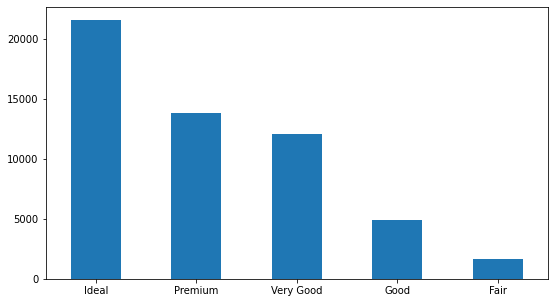

In [7]:
# Class sample distribution

data['cut'].value_counts().plot(kind='bar', figsize=(9,5), rot=0)

In [8]:
# Statistical analysis of features

descriptive_stats = data.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f339e9dd050>,
      dtype=object)

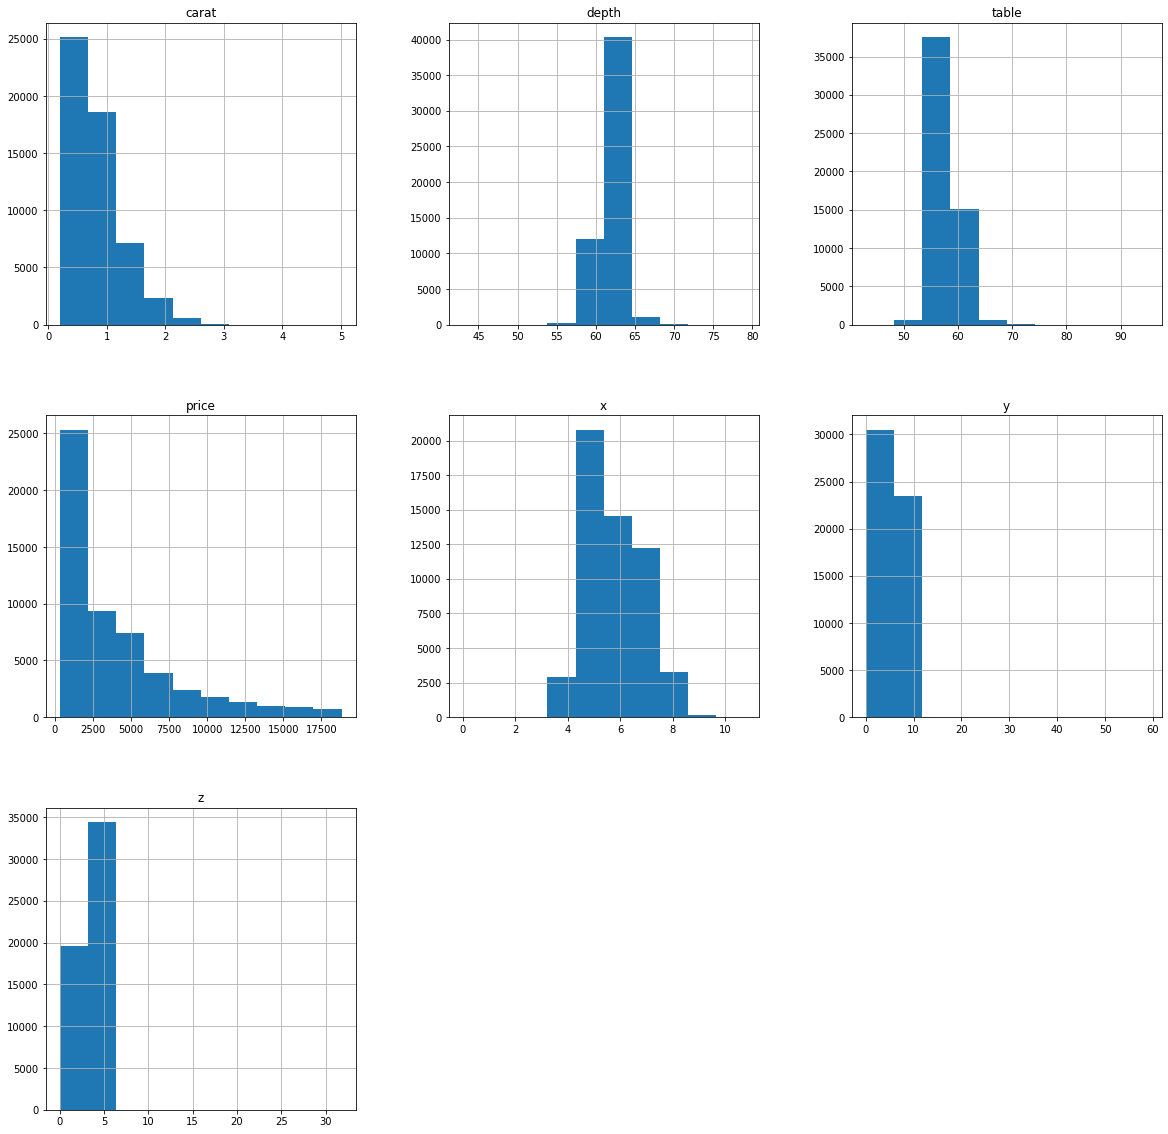

In [9]:
# Histogram plot of each feature 

from matplotlib import pyplot as plt

data.hist(figsize=(20, 20))
plt.show()

## Preprocessing

In [10]:
# Outlier samples were removed using Z-score

print("Sample counts of classes before outlier removal\n")
data['cut'].value_counts()
initial = data.shape[0]

import numpy as np
from scipy import stats

# 3 was chosen for threshold as it is widely used in many applications
data_no_outlier = data[(np.abs(stats.zscore(data[data.columns.difference(['cut', 'clarity', 'color'])])) < 3).all(axis=1)]

print("\n\nSample counts of classes after outlier removal\n")
data_no_outlier['cut'].value_counts()

print(f"\n\n{initial-data_no_outlier.shape[0]} samples were removed")

Sample counts of classes before outlier removal



Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64



Sample counts of classes after outlier removal



Ideal        21120
Premium      13265
Very Good    11762
Good          4523
Fair           920
Name: cut, dtype: int64



2350 samples were removed


In [ ]:
# Converting categorical variables to numerical for raw dataset

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
 
label = le.fit_transform(data['color'])
data.drop("color", axis=1, inplace=True)
data["color"] = label

label = le.fit_transform(data['clarity'])
data.drop("clarity", axis=1, inplace=True)
data["clarity"] = label

label = le.fit_transform(data['cut'])
data.drop("cut", axis=1, inplace=True)
data["cut"] = label

# Mapping information of int labels to corresponding class names
classes_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Converting categorical variables to numerical for no outlier dataset

label = le.fit_transform(data_no_outlier['color'])
data_no_outlier.drop("color", axis=1, inplace=True)
data_no_outlier["color"] = label

label = le.fit_transform(data_no_outlier['clarity'])
data_no_outlier.drop("clarity", axis=1, inplace=True)
data_no_outlier["clarity"] = label

label = le.fit_transform(data_no_outlier['cut'])
data_no_outlier.drop("cut", axis=1, inplace=True)
data_no_outlier["cut"] = label

# Mapping information of int labels to corresponding class names
classes_mapping_2 = dict(zip(le.classes_, le.transform(le.classes_)))

In [12]:
# Splitting into features "X" and target "y" for raw dataset

X = data.drop('cut', axis=1)
y = data['cut']

X.shape, y.shape

# Splitting into features "X" and target "y" for no outlier dataset

X_no_outlier = data_no_outlier.drop('cut', axis=1)
y_no_outlier = data_no_outlier['cut']

X_no_outlier.shape, y_no_outlier.shape

((53940, 9), (53940,))

((51590, 9), (51590,))

In [13]:
# Scaling all the features
from sklearn import preprocessing

# For raw dataset
r_scaler = preprocessing.RobustScaler()
X_scaled = r_scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# For no outlier dataset -> From now on, no outlier will be used as "_no" for variable names
r_scaler = preprocessing.RobustScaler()
X_scaled_no = r_scaler.fit_transform(X_no_outlier)

X_scaled_no = pd.DataFrame(X_scaled_no, index=X_no_outlier.index, columns=X_no_outlier.columns)

In [14]:
from sklearn.model_selection import train_test_split

# Train and test split for raw dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and test split for no outlier dataset
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_scaled_no, y_no_outlier, test_size=0.2, random_state=42)

In [15]:
# Sampling will be applied to no outlier dataset only and relevant variables will be named as "_new"

print("Before sampling:\n")
pd.DataFrame(y_train_no)['cut'].value_counts()

X_test_new = X_test_no
y_test_new = y_test_no

# Dealing with imbalance by combining two sampling technique

# Under sampling the majority class
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(sampling_strategy={2: 15000}, random_state=42)
X_train_new, y_train_new = rus.fit_resample(X_train_no, y_train_no)

print("\n\nAfter majority class sampling:\n")
pd.DataFrame(y_train_new)['cut'].value_counts()

# Over sampling the minority classes
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={3: 15000, 4: 15000, 1:5000, 0:5000}, random_state=42)
X_train_new, y_train_new = sm.fit_resample(X_train_new, y_train_new)

print("\n\nAfter minority classes sampling:\n")
pd.DataFrame(y_train_new)['cut'].value_counts()

Before sampling:



2    16834
3    10607
4     9467
1     3624
0      740
Name: cut, dtype: int64



After majority class sampling:



2    15000
3    10607
4     9467
1     3624
0      740
Name: cut, dtype: int64



After minority classes sampling:



2    15000
3    15000
4    15000
0     5000
1     5000
Name: cut, dtype: int64

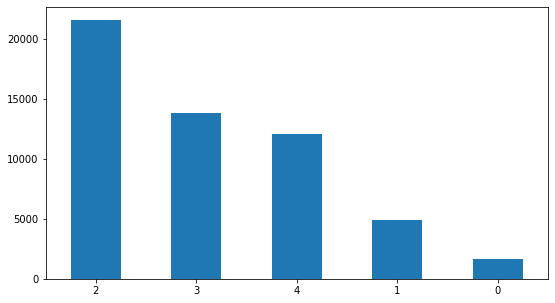

In [16]:
# Class sample distribution of raw dataset

data['cut'].value_counts().plot(kind='bar', figsize=(9,5), rot=0)

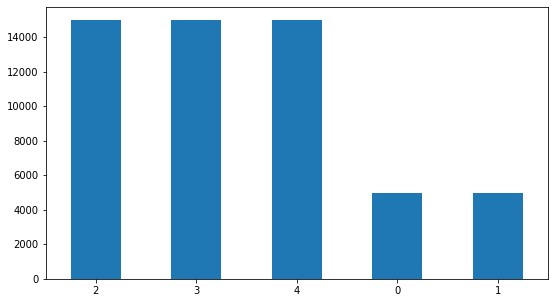

In [17]:
# Class sample distribution of no outlier and sampled dataset

pd.DataFrame(y_train_new)['cut'].value_counts().plot(kind='bar', figsize=(9,5), rot=0)

## Building K-NN Model

In [18]:
# A function to print prediction result of models

from sklearn.metrics import classification_report, confusion_matrix

def evaluate(y_test, y_pred):
  
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("\n\nConfusion Matrix:")
  print(conf_matrix)

  metrics = classification_report(y_test, y_pred)
  print("\n\nClassification Report:",)
  print (metrics)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

CLASS_NUMBER = y_train.unique().size

knn_default = KNeighborsClassifier()

# Training on raw dataset with default K-NN parameters
knn_default.fit(X_train, y_train)
y_pred = knn_default.predict(X_test)
evaluate(y_test, y_pred)

# Training on new dataset with default K-NN parameters
knn_default.fit(X_train_new, y_train_new)
y_pred_new = knn_default.predict(X_test_new)
evaluate(y_test_new, y_pred_new)

KNeighborsClassifier()



Confusion Matrix:
[[ 268   51    4    5    7]
 [  36  535   32  139  262]
 [   1   18 3904  212  157]
 [   1   86  380 1940  368]
 [   6  273  677  795  631]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       335
           1       0.56      0.53      0.54      1004
           2       0.78      0.91      0.84      4292
           3       0.63      0.70      0.66      2775
           4       0.44      0.26      0.33      2382

    accuracy                           0.67     10788
   macro avg       0.65      0.64      0.64     10788
weighted avg       0.65      0.67      0.65     10788



KNeighborsClassifier()



Confusion Matrix:
[[ 144   22    1    6    7]
 [  58  444   17   91  289]
 [  10   19 3544  274  439]
 [  12   74  229 1721  622]
 [  21  245  505  730  794]]


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       180
           1       0.55      0.49      0.52       899
           2       0.82      0.83      0.83      4286
           3       0.61      0.65      0.63      2658
           4       0.37      0.35      0.36      2295

    accuracy                           0.64     10318
   macro avg       0.59      0.62      0.60     10318
weighted avg       0.64      0.64      0.64     10318



## Parameter Optimization and Fine-Tuning

In [20]:
# # Grid search for raw dataset

# from sklearn.model_selection import GridSearchCV

# # grid_params = {
# #     'n_neighbors': [3],
# #     'weights': ['uniform', 'distance'],
# #     'metric': ['euclidean', 'manhattan', 'minkowski'],
# #     'algorithm': ['auto', 'ball_tree', 'kd_tree'],
# #     'leaf_size': [10, 30, 50]
# # }

# grid_params = {
#     'n_neighbors': [15, 20, 25, 30, 40],
#     'weights': ['uniform'],
#     'metric': ['euclidean'],
#     'algorithm': ['auto'],
#     'leaf_size': [10]
# }

# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=3, cv=3, n_jobs=-1)
# gs_result = gs.fit(X_train, y_train)

# gs_result.best_params_

# # GridS 1 best params -> algorithm = 'auto', leaf_size = 10, metric = 'euclidean', weights = 'uniform'
# # GridS 2 best params -> n_neighbors = 10
# # GridS 3 best params -> n_neighbors = 30

In [21]:
# # Grid search for new dataset

# from sklearn.model_selection import GridSearchCV

# # grid_params = {
# #     'n_neighbors': [20],
# #     'weights': ['uniform', 'distance'],
# #     'metric': ['euclidean', 'manhattan', 'minkowski'],
# #     'algorithm': ['auto', 'ball_tree', 'kd_tree'],
# #     'leaf_size': [10, 30, 50]
# # }

# grid_params = {
#     'n_neighbors': [3, 6, 9, 10],
#     'weights': ['distance'],
#     'metric': ['manhattan'],
#     'algorithm': ['auto'],
#     'leaf_size': [10]
# }

# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=3, cv=3, n_jobs=-1)
# gs_result = gs.fit(X_train_new, y_train_new)

# gs_result.best_params_

# # GridS 1 best params -> algorithm = 'auto', leaf_size = 10, metric = 'manhattan', weights = 'distance'
# # GridS 2 best params -> n_neighbors = 20
# # GridS 3 best params -> n_neighbors = 10
# # GridS 4 best params -> n_neighbors = 6

In [22]:
# Training on raw dataset with optimised K-NN parameters
knn_optimised = KNeighborsClassifier(n_neighbors = 30, algorithm = 'auto', leaf_size = 10, metric = 'euclidean', weights = 'uniform')
knn_optimised.fit(X_train, y_train)
y_pred = knn_optimised.predict(X_test)
evaluate(y_test, y_pred)

# Training on new dataset with optimised K-NN parameters
knn_optimised_new = KNeighborsClassifier(n_neighbors = 6, algorithm = 'auto', leaf_size = 10, metric = 'manhattan', weights = 'distance')
knn_optimised_new.fit(X_train_new, y_train_new)
y_pred_new = knn_optimised_new.predict(X_test_new)
evaluate(y_test_new, y_pred_new)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=30)



Confusion Matrix:
[[ 236   86    2    6    5]
 [  16  513   25  163  287]
 [   1    5 3950  220  116]
 [   0   22  365 2153  235]
 [   1  165  696  880  640]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       335
           1       0.65      0.51      0.57      1004
           2       0.78      0.92      0.85      4292
           3       0.63      0.78      0.69      2775
           4       0.50      0.27      0.35      2382

    accuracy                           0.69     10788
   macro avg       0.70      0.64      0.65     10788
weighted avg       0.67      0.69      0.67     10788



KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=6,
                     weights='distance')



Confusion Matrix:
[[ 140   28    2    6    4]
 [  46  437   17   93  306]
 [   4   12 3583  251  436]
 [   6   39  187 1744  682]
 [   9  232  475  764  815]]


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       180
           1       0.58      0.49      0.53       899
           2       0.84      0.84      0.84      4286
           3       0.61      0.66      0.63      2658
           4       0.36      0.36      0.36      2295

    accuracy                           0.65     10318
   macro avg       0.62      0.62      0.62     10318
weighted avg       0.65      0.65      0.65     10318



## Visualization of Results

Text(0.5, 15.0, 'Ground Truth')

Text(91.68, 0.5, 'Predicted Class')

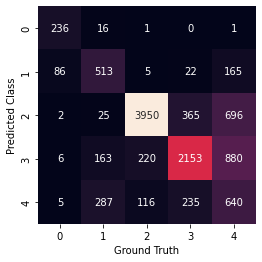

In [23]:
mat = confusion_matrix(y_test, y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 

plt.xlabel('Ground Truth') 
plt.ylabel('Predicted Class')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3398798090>,
       classes=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'],
       estimator=KNeighborsClassifier(leaf_size=10, metric='euclidean',
                                      n_neighbors=30))

0.8898597355295487

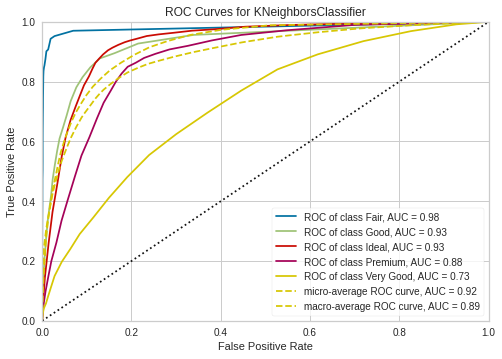

In [24]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(knn_optimised, classes=list(classes_mapping.keys()))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Paired T-Test

In [25]:
score = knn_default.fit(X_train, y_train).score(X_test, y_test)
score_optimized = knn_optimised.fit(X_train, y_train).score(X_test, y_test)

# We had %2 improvement as we saw in the previous meeting
print('K-NN default with raw dataset accuracy: %.2f%%' % (score*100))
print('K-NN optimised with raw dataset accuracy: %.2f%%' % (score_optimized*100))

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=knn_default, estimator2=knn_optimised, X=X, y=y)
alpha = 0.05

print("\nT statistic: %.3f" % t)
print("Alpha: ", alpha)
print("P value: %.6f" % p)

if p > alpha:
  print("\nFail to reject null hypotesis")
else:
  print("\nReject null hypotesis")

# We reject the null hypothesis, which means there is a real difference between the models' performance (accuracy)

K-NN default with raw dataset accuracy: 67.46%
K-NN optimised with raw dataset accuracy: 69.45%

T statistic: 15.596
Alpha:  0.05
P value: 0.000020

Reject null hypotesis
